### Modelos baseados em árvores

<br>

Ao longo do módulo, discutimos bastante as árvores de decisão, bem como ensemble de árvores, como Random Forest e algoritmos do tipo boosting.

Esses __ensembles acabam tendo muitos hiperparâmetros;__ escolhe-los de forma manual acaba sendo muito custoso e tedioso. 

Neste exercício, vamos discutir a respeito da metolodia __grid-search__, que otimiza essa busca de hiperparâmetros.

Considere o dataset abaixo (basta executar as células):

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [4]:
#problema de regressão

X, y = load_diabetes().data, load_diabetes().target
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25, random_state = 42)
print(Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape)

(331, 10) (111, 10) (331,) (111,)


Imagine que queremos testar - usando cross-validation - várias instâncias de Random Forests: com 10 árvores, com 100 árvores, com 1000 árvores, com profundidade máxima 1, 5, 10. 

Como podemos proceder? O código abaixo exemplifica um jeito:

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

for n_est in [10,100,100]:
    for prof in [1,5,10]:
        rf = RandomForestRegressor(n_estimators=n_est, max_depth=prof)
        cvres = cross_val_score(estimator=rf, X = Xtrain, y = ytrain, cv = 3, scoring='r2')
        print("estimators: ", n_est, " prof: ", prof, " | R2 mean / std: ", cvres.mean(), ' / ', cvres.std())

estimators:  10  prof:  1  | R2 mean / std:  0.31290656956064306  /  0.06359861150078665
estimators:  10  prof:  5  | R2 mean / std:  0.4040054008325093  /  0.03576622193313895
estimators:  10  prof:  10  | R2 mean / std:  0.3520088846117244  /  0.04610469664919615
estimators:  100  prof:  1  | R2 mean / std:  0.3342349757188634  /  0.0456247524300806
estimators:  100  prof:  5  | R2 mean / std:  0.4273057528193333  /  0.0322429470907632
estimators:  100  prof:  10  | R2 mean / std:  0.4221986955887749  /  0.0502518351739206
estimators:  100  prof:  1  | R2 mean / std:  0.3260124377481863  /  0.04100639431260665
estimators:  100  prof:  5  | R2 mean / std:  0.4191770380741597  /  0.03564052134085777
estimators:  100  prof:  10  | R2 mean / std:  0.41431290516397207  /  0.038451203577848356


Podemos, com algum trabalho, escolher o melhor modelo.

Se quisermos testar mais parâmetros, podemos aumentar nosso loop... mais isso vai ficando cada vez mais complicado.

A proposta do __grid-search__ é justamente fazer isso de forma mais automática!

Podemos importar a função GridSearchCV do módulo model_selection do sklearn e usá-la para isso. 
Na prática, precisamos definir um __estimador base__ para o grid. Além disso, precisamos definir um __dicionário de parâmetros__ a ser testado. Ainda, definiremos a quantidade de folds para cross-validation e qual a métrica de performance que queremos otimizar:

In [6]:
#importando a função
from sklearn.model_selection import GridSearchCV

In [7]:
#definindo o estimador base
estimador_base = RandomForestRegressor()

#definindo o dicionario de parâmetros do modelo
params_RF = {"n_estimators":[10,1000], "max_depth":[2,10]}

In [8]:
grid = GridSearchCV(estimator = estimador_base, 
                    param_grid = params_RF, 
                    scoring = 'r2', 
                    cv = 3)

grid

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 10], 'n_estimators': [10, 1000]},
             scoring='r2')

In [9]:
#treinando os modelos no grid
grid.fit(Xtrain, ytrain)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 10], 'n_estimators': [10, 1000]},
             scoring='r2')

O objeto "grid", após o treinamento acima, conterá várias informações muito relevantes. 

__1- "best_params_":__ retorna os melhores parâmetros, de acordo com a métrica de performance avaliada na cross-validation;

__1- "best_score_":__ retorna o melhor score - métrica de performance - nos dados de validação;

__1- "best_estimator_":__ retorna o melhor modelo, já treinado;

__1- "cv_results_":__ retorna uma visão geral dos resultados.

In [10]:
grid.best_params_

{'max_depth': 10, 'n_estimators': 1000}

In [11]:
grid.best_score_

0.4226534257691504

In [12]:
grid.best_estimator_

RandomForestRegressor(max_depth=10, n_estimators=1000)

In [13]:
grid.cv_results_

{'mean_fit_time': array([0.00874273, 0.68031859, 0.01007899, 0.98769736]),
 'std_fit_time': array([2.35503387e-03, 1.93959053e-03, 4.72479352e-05, 2.50571158e-03]),
 'mean_score_time': array([0.00076056, 0.04271253, 0.00078646, 0.04967205]),
 'std_score_time': array([5.42938662e-05, 7.14665629e-05, 2.03074540e-05, 4.67225572e-04]),
 'param_max_depth': masked_array(data=[2, 2, 10, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[10, 1000, 10, 1000],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 2, 'n_estimators': 10},
  {'max_depth': 2, 'n_estimators': 1000},
  {'max_depth': 10, 'n_estimators': 10},
  {'max_depth': 10, 'n_estimators': 1000}],
 'split0_test_score': array([0.31915553, 0.3434954 , 0.3381438 , 0.3695708 ]),
 'split1_test_score': array([0.44278387, 0.44915356, 0.44660896, 0.45231881]),
 'split2_tes

__Exercício 1:__ Utilizando o dataset abaixo, faça um grid_search com KNN's, Random Forests e GradientBoostings e retorne o melhor modelo de cada tipo.

__Obs.:__ Lembre-se de fazer um pré-processamento nos dados!

In [14]:
#preco_mediano_das_casas é a variável target
df = pd.read_csv("preco_casas.csv")
print(df.shape)
df.head()

(20640, 10)


,longitude,latitude,idade_mediana_das_casas,total_comodos,total_quartos,populacao,familias,salario_mediano,preco_mediano_das_casas,proximidade_ao_mar
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,PERTO DA BAÍA
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,PERTO DA BAÍA
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,PERTO DA BAÍA
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,PERTO DA BAÍA
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,PERTO DA BAÍA


In [15]:
df.shape

(20640, 10)

In [16]:
df.columns

Index(['longitude', 'latitude', 'idade_mediana_das_casas', 'total_comodos',
       'total_quartos', 'populacao', 'familias', 'salario_mediano',
       'preco_mediano_das_casas', 'proximidade_ao_mar'],
      dtype='object')

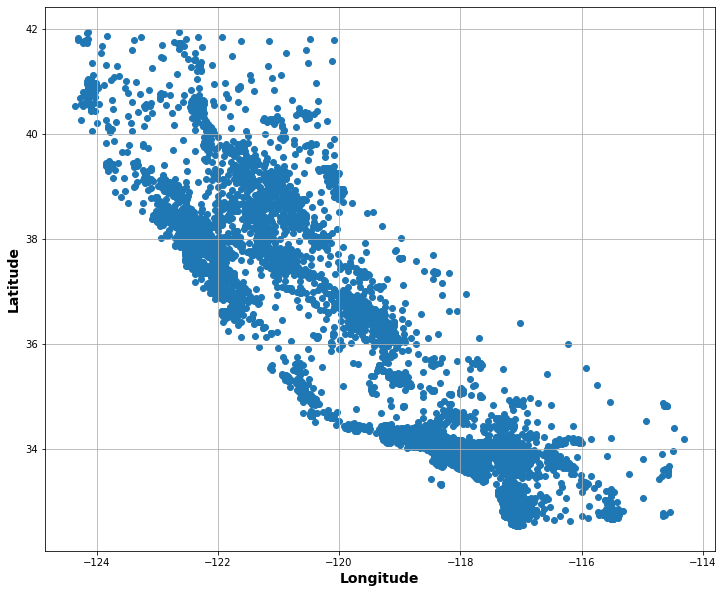

In [17]:
plt.figure(figsize=[12,10])
plt.scatter(df.longitude, df.latitude)
plt.xlabel('Longitude', fontsize=14, fontweight ='bold')
plt.ylabel("Latitude", fontsize=14, fontweight='bold')
plt.grid()
plt.show()

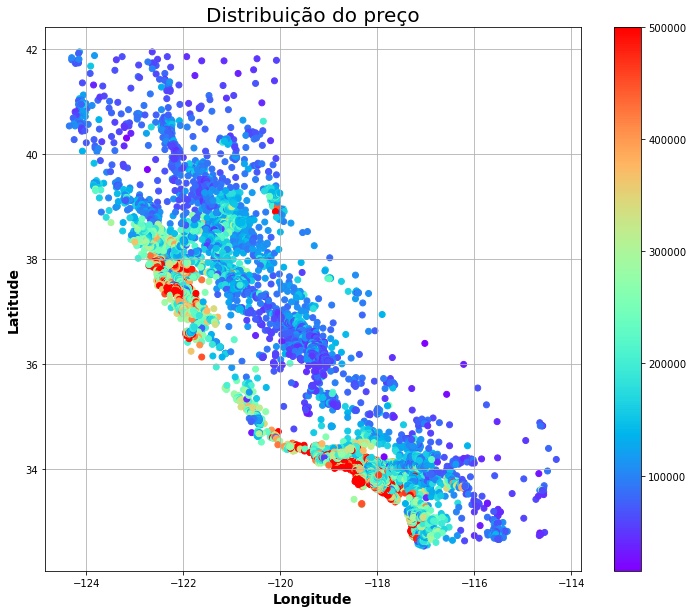

In [18]:
plt.figure(figsize=[12,10])
plt.scatter(df.longitude, df.latitude, c = df.preco_mediano_das_casas, cmap = plt.cm.rainbow)
plt.title("Distribuição do preço", fontsize = 20)
plt.xlabel("Longitude", fontsize = 14, fontweight = 'bold')
plt.ylabel("Latitude", fontsize = 14, fontweight = 'bold')
plt.colorbar()
plt.grid()
plt.show()

In [19]:
df.corr()['preco_mediano_das_casas']

longitude                 -0.045967
latitude                  -0.144160
idade_mediana_das_casas    0.105623
total_comodos              0.134153
total_quartos              0.049686
populacao                 -0.024650
familias                   0.065843
salario_mediano            0.688075
preco_mediano_das_casas    1.000000
Name: preco_mediano_das_casas, dtype: float64

## Processamento dos dados

1- Engenharia de variáveis

2- Tratamento de valores faltantes

3- Tratamento de variáveis categóricas 

4- Normalização dos dados

In [20]:
def processamento_dos_dados(df, dataset_de_treino = True, cat_encoder = None, std_scaler = None):
    dff = df.copy()
    
    dff['comodos_por_familia'] = dff['total_comodos']/dff['familias']
    dff['quartos_por_comodos'] = dff['total_quartos']/ dff['total_comodos']
    dff['populacao_por_familia'] = dff['populacao'] / dff['familias']
    
    dff = dff.dropna(axis = 0)
    
    variaveis_para_normalizar = ['latitude',
                                 'longitude',
                                'idade_mediana_das_casas',
                                 'total_comodos',
                                 'total_quartos',
                                 'populacao',
                                 'familias',
                                 'salario_mediano',
                                 'comodos_por_familia',
                                 'quartos_por_comodos',
                                 'populacao_por_familia']
    if dataset_de_treino:
        
        encoder = OneHotEncoder()
        df_prox_mar_OHE = encoder.fit_transform(dff[['proximidade_ao_mar']]).toarray()
        
        sc = StandardScaler()
        variaveis_norm = sc.fit_transform(dff[variaveis_para_normalizar])
        
        X, y = np.c_[df_prox_mar_OHE, variaveis_norm], dff.preco_mediano_das_casas.values
        return X, y, encoder, sc
    else:
        df_prox_mar_OHE = cat_encoder.transform(dff[['proximidade_ao_mar']]).toarray()
        
        variaveis_norm = std_scaler.transform(dff[variaveis_para_normalizar])
        
        X, y = np.c_[df_prox_mar_OHE, variaveis_norm], dff.preco_mediano_das_casas.values
        return X, y

In [21]:
dftrain, dftest = train_test_split(df, test_size=0.25, random_state=0)
dftrain.shape, dftest.shape

((15480, 10), (5160, 10))

In [22]:
Xtrain, ytrain, encoder_train, scaler_train  = processamento_dos_dados(df = dftrain, 
                                                                         dataset_de_treino = True, 
                                                                         cat_encoder = None, 
                                                                         std_scaler = None)
Xtrain.shape, ytrain.shape

((15331, 16), (15331,))

In [23]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import precision_score, accuracy_score, recall_score, r2_score, fbeta_score
from sklearn.metrics import make_scorer

knn = KNeighborsRegressor()
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()

In [25]:
parametros = {"n_estimators":[2,5,10,100,300, 400], "max_depth":[2, 3, 4,5,6, 7]}

grid = GridSearchCV(estimator=rfr, param_grid=parametros, scoring='r2', cv=2)
grid.fit(Xtrain, ytrain)

GridSearchCV(cv=2, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'n_estimators': [2, 5, 10, 100, 300, 400]},
             scoring='r2')

In [26]:
grid.best_params_

{'max_depth': 7, 'n_estimators': 400}

In [27]:
grid.best_score_

0.7441147923736888

In [28]:
grid.best_estimator_

RandomForestRegressor(max_depth=7, n_estimators=400)

In [29]:
parametros = {"n_neighbors":[3, 2, 5,6,7,9, 13, 19]}

grid = GridSearchCV(estimator=knn, param_grid=parametros, scoring='r2', cv=2)
grid.fit(Xtrain, ytrain)

GridSearchCV(cv=2, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 2, 5, 6, 7, 9, 13, 19]},
             scoring='r2')

In [30]:
grid.best_params_

{'n_neighbors': 9}

In [31]:
grid.best_score_

0.7111718412653767

In [32]:
grid.best_estimator_

KNeighborsRegressor(n_neighbors=9)

In [33]:
parametros = {"n_estimators":[100,500, 600], 'max_depth':[3,5, 6], 'learning_rate':[0.1,0.2,0.6]}

grid = GridSearchCV(estimator=gbr, param_grid=parametros, scoring='r2', cv=2)
grid.fit(Xtrain, ytrain)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.2, 0.6],
                         'max_depth': [3, 5, 6],
                         'n_estimators': [100, 500, 600]},
             scoring='r2')

In [34]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 600}

In [35]:
grid.best_score_

0.8256674456160336

In [36]:
grid.best_estimator_

GradientBoostingRegressor(max_depth=6, n_estimators=600)

In [166]:
class gridSearchAll():
    
    def __init__(self, scoring, num_folds):
        self.grid_models = []
        self.scoring = scoring
        self.num_folds = num_folds
        self.grid = []
    
    def insert_model(self,estimator_base, param_grid):
        self.grid_models.append([estimator_base, param_grid])
        
    def fit_all(self,X, y):
        for models in self.grid_models:
            self.grid.append(GridSearchCV(estimator = models[0], param_grid=models[1], scoring=self.scoring, cv=self.num_folds).fit(X, y))
    
    def best_all_grid_models(self):    
        score = []
        for n in range(len(self.grid)):
            score.append(self.grid[n].best_score_)
            
        for elements in self.grid:
            if elements.best_score_ == max(score):
                print('Melhor modelo: ', elements.best_estimator_)
                print('Melhores parâmetros: ', elements.best_params_)
                print('score: ', elements.best_score_)

In [169]:
grid = gridSearchAll('r2', 3)
grid.insert_model(knn, {"n_neighbors":[3, 2, 5]})
grid.insert_model(rfr, {"n_estimators":[100, 300, 400], "max_depth":[3, 4, 5]})
grid.insert_model(gbr, {"n_estimators":[100, 300, 400], 'max_depth':[3, 5, 6], 'learning_rate':[0.1,0.2, 0.5]})
grid.fit_all(Xtrain, ytrain)

In [170]:
grid.best_all_grid_models()

Melhor modelo:  GradientBoostingRegressor(max_depth=6, n_estimators=400)
Melhores parâmetros:  {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 400}
score:  0.8335835912551074


In [ ]:
tanto na execução sozinho com o GridSearchCV quanto na execução da função gridSearchAll os melhores resultados obtidos foram com o GradientBoostingRegressor
ficando em media de 